# Probability Distributions

Probability distributions are mathematical functions that we can use to model real-world processes. These distributions provide the probabilities of occurrence of different possible outcomes in an experiment.

In this lesson we will discuss four of the most common distributions: uniform, normal, binomial, and poisson. We will also discuss how to work with these distributions with python and scipy.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import viz # curriculum viz example code

np.random.seed(123)

## Types of Distributions
- Uniform distributions have equal likelihoods among all outcomes, like a fair coin.
- Binomial distributions are all about determining a binary outcome of an event. Success/failure, for example.
- Normal distributions model a continuous random variable. 
- Poisson distributions model a certain amount of events occuring over a time interval
- There are [many more](https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm) distribution shapes. This lesson will focus on the first four.

## Working With Distribution Objects from `scipy.stats`
1. Consider the situation at hand and determine the appropriate distribution type.
2. Create the distribution object using the `stats` module from scipy. 
3. Ask yourself what information you have and what information you need.
4. Utilize the diagram below to call the appropriate distribution. *Hey Python, you do the calculus!*
5. Because these distribution objects represent the distribution itself and not specific numbers, use the `rvs` method if you need to generate actual random numbers (for visualizing or using to produce simulation experiments)

## Diagram to Select the Appropriate Distribution Method
![](pdf_pmf_cdf_ppf_sf_isf.png)

## Uniform Distribution

The uniform distribution can be used to model events where the outcome is discrete and each outcome has an equally likely chance of happening.

An example of an event that can be modeled with the uniform distribution is the outcome of rolling a 6-sided die.

Since the uniform distribution is conceptually simple, we will use it as an example of how to work with different distributions in scipy.

## Working with distributions in SciPy

Scipy provides many different ways of interacting with various statistical distributions through it's `stats` module.

We will discuss the following distribution methods:

- `rvs`
- `pmf` / `pdf`
- `cdf` / `ppf`
- `sf` / `isf`

Before using any of the above methods, a distribution must be created, and any parameters that define that distribution must be defined (we'll see more examples of this as we discuss other types of distributions). To represent rolling a dice, we'll use the `randint` distribution and specify that the outcomes are from 1 - 6

In [2]:
die_distribution = stats.randint(1, 7)

While our example here is fairly simple, and the values we are calculating could easily be calculated by hand, the same principles that we get into here will apply to all the distributions we talk about where the calculations are not so easy.

Now that we have created the distribution object, we will explore some different ways to use it.

### Random Values

We can generate random values based on the distribution with the `rvs` method. We can pass

- no arguments to get a single random value
- a single integer to get that many random values
- a tuple with the dimensions of a matrix of random values

In [3]:
die_distribution.rvs()

6

In [4]:
die_distribution.rvs(5)

array([3, 5, 3, 2, 4])

In [5]:
die_distribution.rvs((5, 5))

array([[3, 4, 2, 2, 1],
       [2, 2, 1, 1, 2],
       [4, 6, 5, 1, 1],
       [5, 2, 4, 3, 5],
       [3, 5, 1, 6, 1]])

Generating random values can be a good way to visualize the distribution.

Text(0.5, 1.0, 'Outcome of 10,000 Dice Rolls')

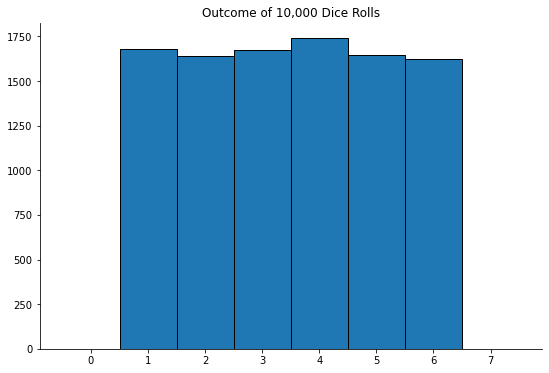

In [6]:
n = 10_000

x = die_distribution.rvs(n)

plt.hist(x, bins=range(0, 9), align='left', width=1, edgecolor='black')
plt.title(f'Outcome of {n:,} Dice Rolls')

### PMF / PDF

The **probability mass function (pmf)** (*probability density function (pdf)* for continuous distributions) is a function that gives us the probability of any single outcome. For example, we could use the pmf to give us the probability of rolling a 3 with our dice rolling distribution:

In [7]:
die_distribution.pmf(3)

0.16666666666666666

!!!note "SciPy Distribution API"
    All of the functions that we discuss here can accept a single value or a list of values and will produce either a single number, or a numpy array of results that correspond to the inputs.
    
    For example, we can calculate multiple pmfs at once like this:
    
    ```python
    die_distribution.pmf([1, 2, 3])
    ```

### CDF / PPF

The **cumulative distribution function** tells us the likelihood of a single outcome or all the results below it. For our dice rolling example, this might be something like "what is the probability of rolling a 3 or lower?"

In [8]:
die_distribution.cdf(3)

0.5

We can visualize this by plotting each of the outcomes against the likelihood of that outcome, and shading the area that we wish to know the probability of:

X = outcome of one dice roll

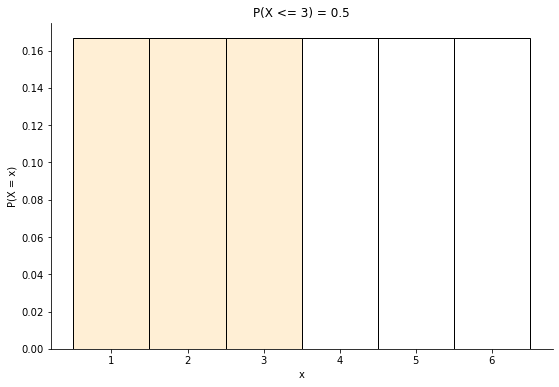

In [9]:
viz.distributions_example1(die_distribution)

Here, the probability of rolling a 3 or lower is represented by the area of the distribution that is shaded, in our case, .5.

---

The **percent point function (ppf)** (also known as the quantile function) can be thought of as the inverse of the cdf.

The ppf accepts a probability, and gives us the value that is associated with that probability:

In [10]:
die_distribution.ppf(5/6)

5.0

### SF / ISF

The **survival function (sf)** tells us what the probability of our random variable falling above a certain value is. This is the same as 1 minus the cdf of the same value.

We can use this to answer questions like: "What is the likelihood we roll a value higher than 4?"

In [11]:
die_distribution.sf(4)

0.33333333333333337

Visualizing the above calculation:

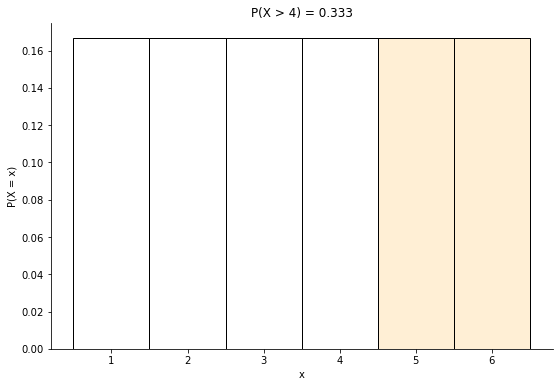

In [12]:
viz.distributions_example2(die_distribution)

Like the ppf, the **inverse survival function (isf)** will give us a value when we provide a probability.

For example: "There is a 1/3 chance a dice roll will be higher than what value?"

In [13]:
die_distribution.isf(1/3)

4.0

## Binomial Distribution

The binomial distribution lets us model the number of successes after a number of trials, given a certain probability of success. The classic example of this is the number of heads you would expect to see after flipping a coin a certain number of times.

A binomial distribution is defined by a number of trials, and a probability of success. These two pieces of information are what we need in order to model a problem with the binomial distribution.

The binomial distribution assumes that each trial is independent of the others.

Let's take an example:

> You are taking a multiple choice test consisting of 30 questions that you forgot to study for. Each question has 4 possible answers and you will choose one at random. What is the probability you get more than 10 of the questions right?

Here we have a probability of success, 0.25, and a number of trials, 30. We'll define X as the number of questions we get right on the test. We want to know the probability that X > 10, which tells us we want to use the survival function.

In [14]:
stats.binom(30, .25).sf(10)

0.10572812269266013

Let's visualize what we are doing here as well. Here is what a binomial distribution looks like for our problem, that is, with n = 30 and p = .25.

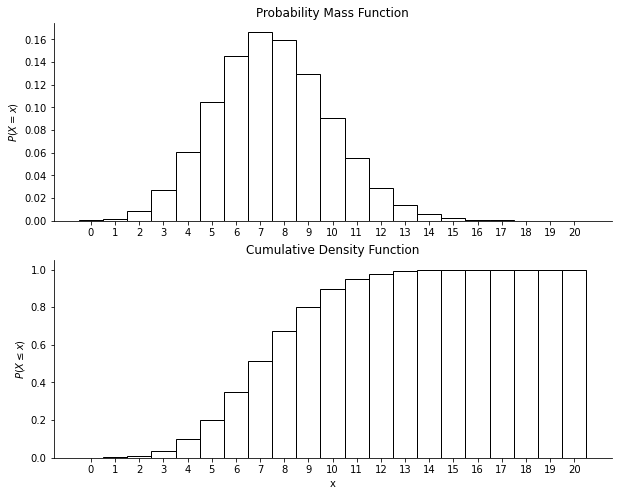

In [15]:
viz.distributions_example3()

When we ask for the probability of more than 10 successes (i.e. questions correct), we are looking for the area in the pmf distribution where x is greater than 10.

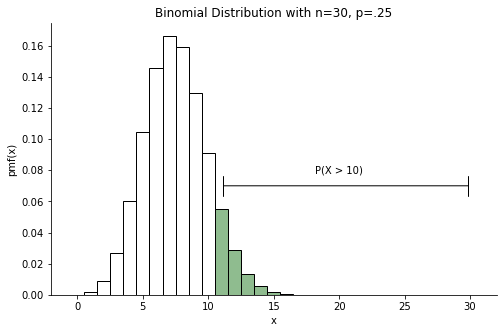

In [16]:
viz.distributions_example4()

Conceptually speaking, the survival function is equal to the sum of all of the areas shaded in green above.

---

The definition of a "success" can vary quite a bit. Really we just need a random variable with two outcomes, and we define one of the two outcomes as a success. For example, we could use the binomial distribution to help answer the following question:

> Suppose there is a 5% chance that a Codeup student will show up late to class. With a class of 20, what is the likelihood that everyone shows up on time?

Here we define a "success" as a student showing up late, and this outcome has a probability of 0.05. We want to know what the probability of 0 successes is. We now have all the pieces we need to use the binomial distribution to answer the question.

In [17]:
stats.binom(20, .05).pmf(0)

0.3584859224085419

Again, a visualization can be helpful:

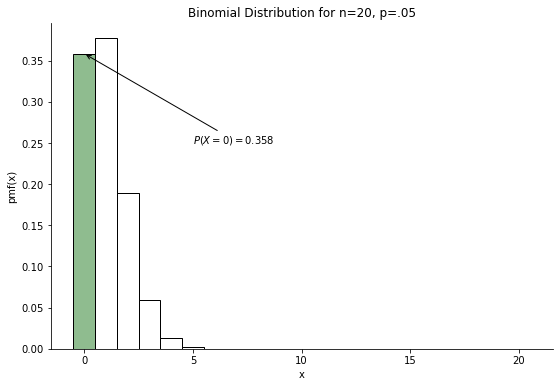

In [18]:
viz.distributions_example5()

Let's visualize what various binomial distributions look like with some simulations:

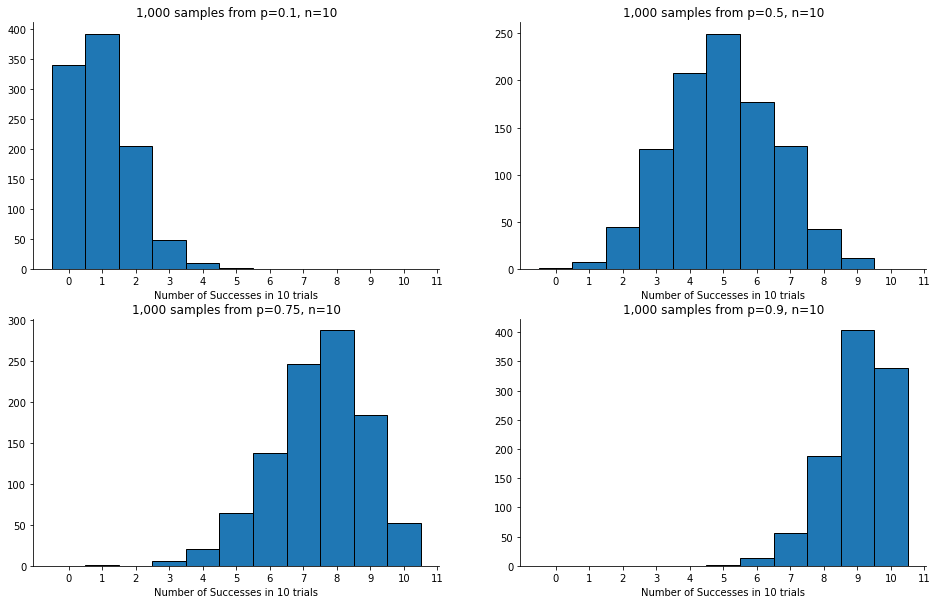

In [19]:
viz.distributions_example6()

!!!note "Bernoulli Distribution"
    A binomial distribution with an n of 1 is referred to as a **Bernoulli Distribution**.

## Normal Distribution

The normal distribution models a continuous random variable where the further away from the mean you are, the less likely the outcome. This is commonly referred to as the "bell curve", and many continous variables tend to follow a normal distribution.

A normal distribution is defined by a mean and a standard deviation. The **standard normal distribution** is a normal distribution with a mean of 0 and standard deviation of 1.

> Suppose that a store's daily sales are normally distributed with a mean of 12,000 dollars and standard deviation of 2000 dollars. How much would the daily sales have to be to be in the top 10% of all days?

Here we are given the mean and standard deviation, and are asked to find the value that corresponds to the top 10%. Here, since we know the probability and want a value, we can use the percent point function to find our answer.

In [20]:
μ = 12000
σ = 2000

sales = stats.norm(μ, σ)

top_10_percent_cutoff = sales.ppf(.9)

print('${:,.2f}'.format(top_10_percent_cutoff))

$14,563.10


Let's visualize what we are doing as well:

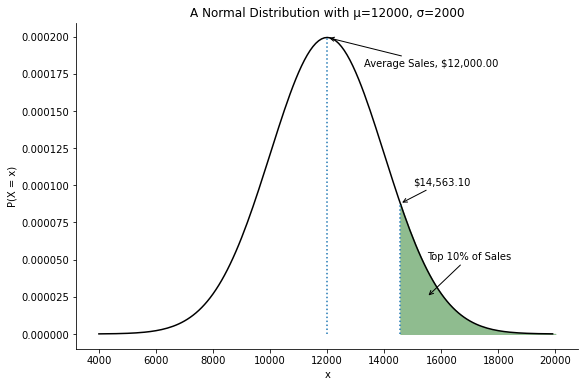

In [21]:
viz.distributions_example7(μ, σ)

Using the same data as before, let's answer another question:

> How likely is it that the store sells less than 10,000 dollars one day?

Here we want to know the probability that our random variable takes on a value less than 10,000, so we can use the cdf.

In [22]:
p = sales.cdf(10_000)

print(f'Ony any given day, there\'s a {p:.1%} chance we sell less than $10,000.')

Ony any given day, there's a 15.9% chance we sell less than $10,000.


Here is what various normal distributions look like with different means and standard deviations:

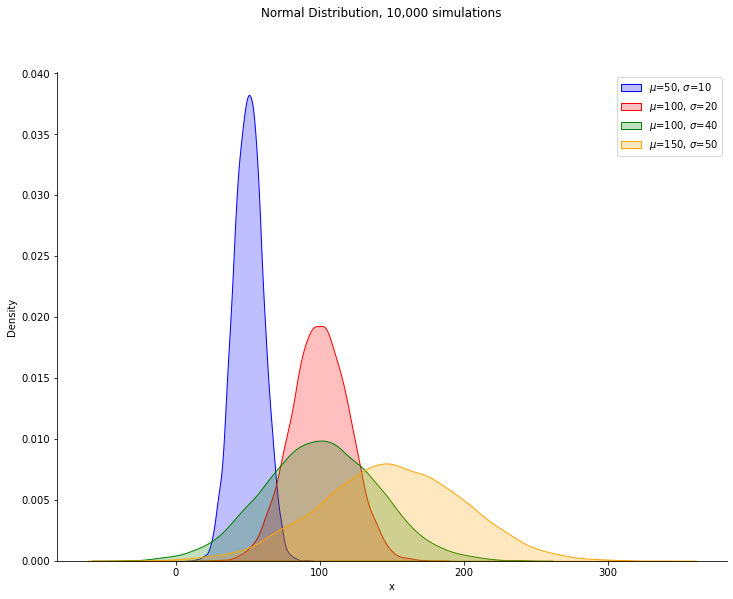

In [23]:
viz.distributions_example8()

## Poisson Distribution

The poisson distribution lets us model a situation where a certain number of events happen over a specified time interval[^1]. The number of events that happen is a discrete measure, and this distribution can tell us the likelihood of a certain number of events occuring over the time period.

[^1]: While time is the most common interval used, the poisson distribution can also be used for intervals like distance, area, or volume.

The poisson distribution assumes that the events are indpendent of each other and independent of the time since the last event. We must also know the average rate to use a poisson distribution.

Some examples of real-world processes that can be modeled with a poisson distribution are:

- The number of emails sent by a mail server in a day
- The number of phone calls received by a call center per hour
- The number of decay events per second from a radioactive source

Let's dive into a specific example:

> Codeup knows that, on average, students consume 5 lbs of coffee per week. How likely is it that the coffee consumption for this week is only 3 lbs?

In [24]:
stats.poisson(5).pmf(3)

0.1403738958142805

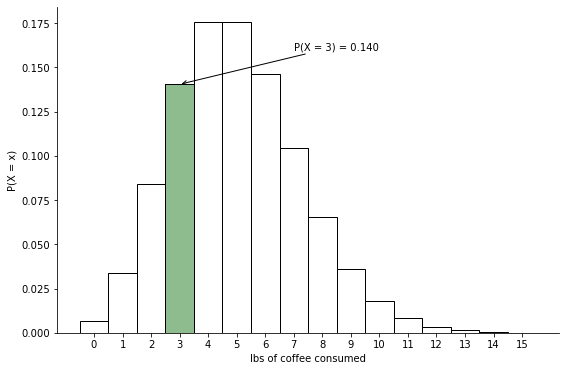

In [25]:
viz.distributions_example10()

What is the likelihood that more than 7 lbs of coffee are consumed?

In [26]:
stats.poisson(5).sf(7)

0.13337167407000744

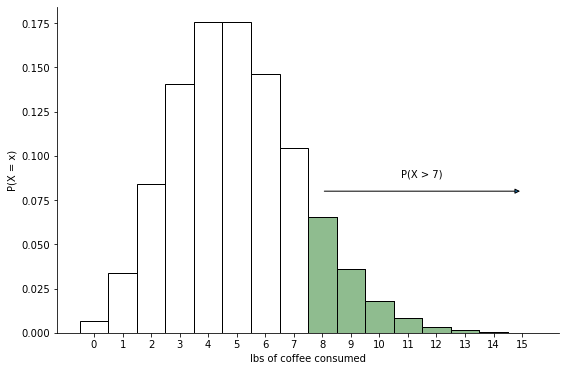

In [27]:
viz.distributions_example11()

Let's take a look at what the poisson distribution looks like with different average rates:

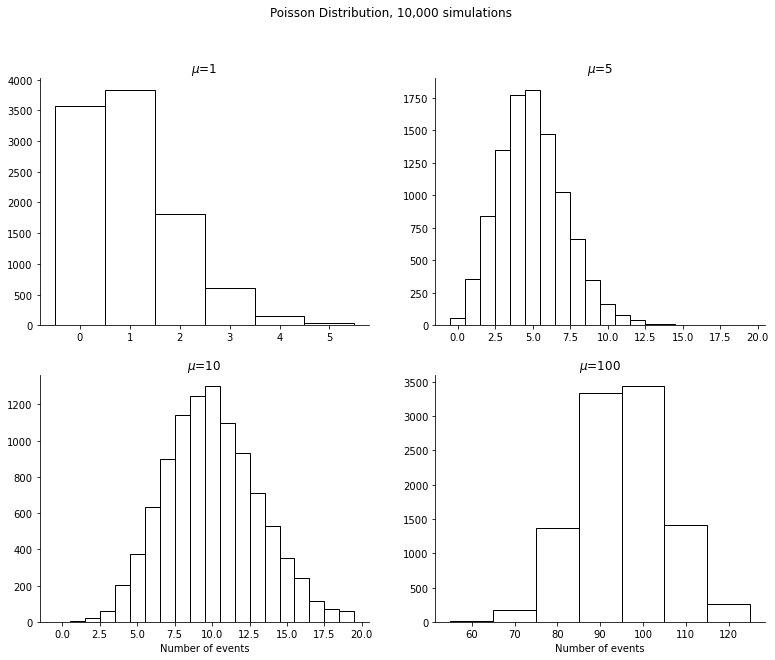

In [28]:
viz.distributions_example12()

## Further Reading

- [Stats: Probability Rules](https://people.richland.edu/james/lecture/m170/ch05-rul.html)
- [Wikipedia: Poisson Distribution](https://en.wikipedia.org/wiki/Poisson_distribution)
- [Details on how to calculate the probability of at least one event occuring](https://www.quora.com/If-there-are-two-independent-events-that-could-occur-A-with-a-chance-of-20-and-B-with-a-chance-of-60-what-is-the-probability-that-at-least-one-of-these-events-will-occur-Explain-how-you-calculated-the-answer)
- [Probability exercise and quiz questions](https://www.analyticsvidhya.com/blog/2017/04/40-questions-on-probability-for-all-aspiring-data-scientists/)
- [Statistics How To: Statistics for the rest of us](https://www.statisticshowto.datasciencecentral.com/)

## Exercises

Do your work for this exercise in either a python script named `probability_distributions.py` or a jupyter notebook named `probability_distributions.ipynb`.

For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

    - What is the probability that no cars drive up in the noon hour?
    - What is the probability that 3 or more cars come through the drive through?
    - How likely is it that the drive through gets at least 1 car?

1. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

    - What grade point average is required to be in the top 5% of the  graduating class?
    - What GPA constitutes the bottom 15% of the class?
    - An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average  qualify for this scholarship?
    - If I have a GPA of 3.5, what percentile am I in?

1. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

1. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

    - What is the probability that at least one of your first 60 answers is correct?

1. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

1. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

1. Connect to the `employees` database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

    1. What percent of employees earn less than 60,000?
    1. What percent of employees earn more than 95,000?
    1. What percent of employees earn between 65,000 and 80,000?
    1. What do the top 5% of employees make?
    
    **Hint** If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", remember that you'll need 3 things: your `.gitignore`, your `env.py`, and to use `pd.read_sql`. Copy over your `.gitignore` and `env.py` from your data science libraries exercises folder, and connect to the employees database like so:
    
    ```python
    import pandas as pd
    import env
    
    url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'  
    pd.read_sql('SELECT * FROM departments', url)
    ```

    